## 14.4 Homework
- 1, Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.
- 2, rewrite the radioactive decay, to generate 1000 random numbers following the non-uniformed distribution.

### Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import *
scene = canvas()

#initialization
L1 = 101
L2 = 101
N = 1000

#plot the trajectory - starting position    
particle = sphere(pos=vector(0,0,0), radius=2, color=color.green)
wallR = box(pos=vector(L1,0,0), size=vector(0.2,L1*2,L1*2))
wallL = box(pos=vector(-L1,0,0), size=vector(0.2,L1*2,L1*2))
wallBack = box(pos=vector(0,0,-L1), size=vector(L1*2,L1*2,-0.2))
wallUp = box(pos=vector(0,L1,0), size=vector(L1*2,0.2,L1*2))
wallGround = box(pos=vector(0,-L1,0), size=vector(L1*2,-0.2,L1*2))
#wallF = box(pos=vector(0,0,L1), size=vector(L1*2,L1*2,0.2))  <--invisible front wall

for i in range(1,N):
    #direction vectors
    right = vector(1,0,0)
    left = vector(-1,0,0)
    up = vector(0,1,0)
    down = vector(0,-1,0)
    
    #creating movement
    move = np.random.randint(4)
    if move == 1:
        particle.velocity = right
        particle.pos += particle.velocity
        rate(100)
        if particle.pos.x > wallR.pos.x:
            particle.velocity = -right
            particle.pos += particle.velocity
            rate(100)
    elif move == 2:
        particle.velocity = left
        particle.pos += particle.velocity
        rate(100)
        if particle.pos.x > wallL.pos.x:
            particle.velocity = -left
            particle.pos += particle.velocity
            rate(100)
    elif move == 3:
        particle.velocity = up
        particle.pos += particle.velocity
        rate(100)
        if particle.pos.y > wallUp.pos.y:
            particle.velocity = -up
            particle.pos += particle.velocity
            rate(100)
    elif move == 4:
        particle.velocity = down
        particle.pos += particle.velocity
        rate(100)
        if particle.pos.y > wallGround.pos.y:
            particle.velocity = -down
            particle.pos += particle.velocity
            rate(100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- I am stuck right now because the ball keeps getting stuck in a corner instead of bouncing off the walls
- additionally, the movement is not that random because it seems to always go in a northeast movement

### Part 2

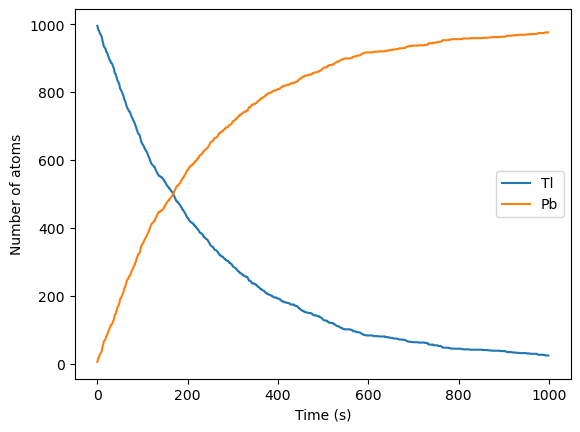

In [5]:
import numpy as np
import matplotlib.pyplot as plt

tau = 3.053*60

N_atom = 1000   #1000 Tl atoms
N_time = 1000   #1000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])  #the array to store the number of newly created atoms in each time step 
N_Tl = N_atom * np.ones([N_time-1])  #the array to store the number of decayed atoms in each time step 

for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    if x0<N_time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()